In [1]:
import torch
from fastai.vision.all import *
from matplotlib import pyplot as plt

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

threes = (path / "train" / "3").ls().sorted()
sevens = (path / "train" / "7").ls().sorted()

# Training Image to tensors
three_tensors = torch.stack(
    [tensor(Image.open(o)) for o in (path / "train" / "3").ls()]
)
seven_tensors = torch.stack(
    [tensor(Image.open(o)) for o in (path / "train" / "7").ls()]
)
valid_3_tensors = torch.stack(
    [tensor(Image.open(o)) for o in (path / "valid" / "3").ls()]
)
valid_7_tensors = torch.stack(
    [tensor(Image.open(o)) for o in (path / "valid" / "7").ls()]
)

# Normalize data
stacked_threes = three_tensors.float() / 255
stacked_sevens = seven_tensors.float() / 255
valid_3_tens = valid_3_tensors.float() / 255
valid_7_tens = valid_7_tensors.float() / 255

In [3]:
BATCH = 256

In [4]:
from nn.loader.dataloader import DataLoaders

In [5]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28 * 28)
train_y = tensor([1] * len(threes) + [0] * len(sevens)).unsqueeze(1)

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28 * 28)
valid_y = tensor([1] * len(valid_3_tens) + [0] * len(valid_7_tens)).unsqueeze(1)

In [6]:
train_x.size(), train_y.size()

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [7]:
dls = DataLoaders(
    x_train=train_x,
    y_train=train_y,
    batch_size=BATCH,
    x_val=valid_x,
    y_val=valid_y
)

In [8]:
from nn.learner.learner import Learner
from nn.model.linear import MNISTModel

In [9]:
learner = Learner(
    dls=dls,
    model=MNISTModel(28 * 28, lr=0.1),
    )

In [10]:
learner.fit(num_epochs=20)

Epoch 1/20, Validation Accuracy: 0.4804
Epoch 2/20, Validation Accuracy: 0.4980
Epoch 3/20, Validation Accuracy: 0.5132
Epoch 4/20, Validation Accuracy: 0.5314
Epoch 5/20, Validation Accuracy: 0.5761
Epoch 6/20, Validation Accuracy: 0.6384
Epoch 7/20, Validation Accuracy: 0.7242
Epoch 8/20, Validation Accuracy: 0.7767
Epoch 9/20, Validation Accuracy: 0.8081
Epoch 10/20, Validation Accuracy: 0.8351
Epoch 11/20, Validation Accuracy: 0.8494
Epoch 12/20, Validation Accuracy: 0.8636
Epoch 13/20, Validation Accuracy: 0.8734
Epoch 14/20, Validation Accuracy: 0.8822
Epoch 15/20, Validation Accuracy: 0.8911
Epoch 16/20, Validation Accuracy: 0.8979
Epoch 17/20, Validation Accuracy: 0.9014
Epoch 18/20, Validation Accuracy: 0.9043
Epoch 19/20, Validation Accuracy: 0.9082
Epoch 20/20, Validation Accuracy: 0.9127


Testing model against valid dataset

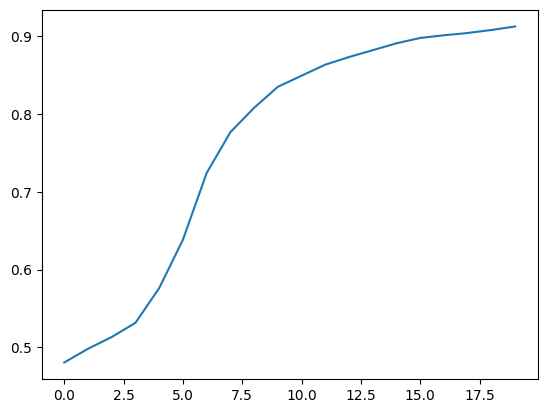

In [11]:
plt.plot(learner.accuracies)

In [81]:
# valid_3_tens = valid_3_tensors.float() / 255
print(valid_3_tens.shape)
preds = []
for o in valid_3_tens:
    flatten_image = valid_3_tens.view(-1, 28*28)
    preds.append(learner.predict(x=flatten_image))
[p for p in preds]

torch.Size([1010, 28, 28])


RuntimeError: a Tensor with 1010 elements cannot be converted to Scalar

So 3 is true

In [36]:
# valid_7_tens = valid_7_tensors.float() / 255
print(valid_7_tens.shape)
preds = []
for o in valid_7_tens:
    flatten_image = valid_7_tens.view(-1, 28*28)
    preds.append(learner.predict(x=flatten_image))
seven = 0
preds[0].shape

torch.Size([1028, 28, 28])


torch.Size([1028, 1])

Its working! (for 3 vs 7)

<Figure size 640x480 with 0 Axes>

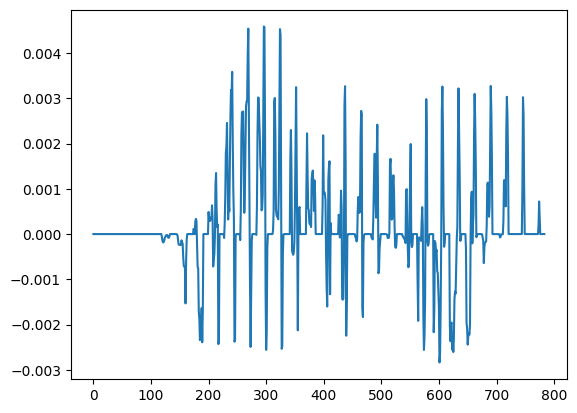

<Figure size 640x480 with 0 Axes>

In [29]:
plt.plot(learner.model.weights.grad)
plt.figure()